In [436]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import xgboost as xgb
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn import metrics
from sklearn.metrics import roc_auc_score
from sklearn.utils import shuffle
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
import matplotlib
from sklearn.metrics import mean_squared_error
import numpy as np
import xgboost as xgb
from sklearn.preprocessing import LabelEncoder
import os
import time
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold, KFold, RepeatedKFold
import lightgbm as lgb
sns.set()
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import warnings
warnings.filterwarnings("ignore")

In [172]:
train=pd.read_csv("X_train.csv")
train.head()

,row_id,series_id,measurement_number,orientation_X,orientation_Y,orientation_Z,orientation_W,angular_velocity_X,angular_velocity_Y,angular_velocity_Z,linear_acceleration_X,linear_acceleration_Y,linear_acceleration_Z
0,0_0,0,0,-0.75853,-0.63435,-0.10488,-0.10597,0.107650,0.017561,0.000767,-0.74857,2.1030,-9.7532
1,0_1,0,1,-0.75853,-0.63434,-0.10490,-0.10600,0.067851,0.029939,0.003385,0.33995,1.5064,-9.4128
2,0_2,0,2,-0.75853,-0.63435,-0.10492,-0.10597,0.007275,0.028934,-0.005978,-0.26429,1.5922,-8.7267
3,0_3,0,3,-0.75852,-0.63436,-0.10495,-0.10597,-0.013053,0.019448,-0.008974,0.42684,1.0993,-10.0960
4,0_4,0,4,-0.75852,-0.63435,-0.10495,-0.10596,0.005135,0.007652,0.005245,-0.50969,1.4689,-10.4410


In [173]:
test=pd.read_csv("X_test.csv")
test.head(10)

,row_id,series_id,measurement_number,orientation_X,orientation_Y,orientation_Z,orientation_W,angular_velocity_X,angular_velocity_Y,angular_velocity_Z,linear_acceleration_X,linear_acceleration_Y,linear_acceleration_Z
0,0_0,0,0,-0.025773,-0.98864,-0.14801,0.003350,-0.006524,-0.001071,-0.027390,0.10043,4.2061,-5.5439
1,0_1,0,1,-0.025683,-0.98862,-0.14816,0.003439,-0.113960,0.083987,-0.060590,-0.70889,3.9905,-8.0273
2,0_2,0,2,-0.025617,-0.98861,-0.14826,0.003571,-0.080518,0.114860,-0.037177,1.45710,2.2828,-11.2990
3,0_3,0,3,-0.025566,-0.98862,-0.14817,0.003609,0.070067,0.033820,-0.035904,0.71096,1.8582,-12.2270
4,0_4,0,4,-0.025548,-0.98866,-0.14792,0.003477,0.152050,-0.029016,-0.015314,3.39960,2.7881,-10.4100
5,0_5,0,5,-0.025554,-0.98868,-0.14780,0.003439,0.099662,-0.033455,0.000277,0.65913,3.4276,-7.0513
6,0_6,0,6,-0.025537,-0.98867,-0.14785,0.003440,-0.042976,0.003585,-0.013641,2.10110,3.8599,-6.5237
7,0_7,0,7,-0.025565,-0.98866,-0.14794,0.003453,-0.072888,0.008765,0.024019,-0.25126,1.0161,-9.1421
8,0_8,0,8,-0.025511,-0.98869,-0.14774,0.003426,0.018765,-0.037082,0.019197,0.50205,1.6148,-10.0490
9,0_9,0,9,-0.025588,-0.98870,-0.14765,0.003409,0.070125,-0.024185,0.058666,1.16320,3.0187,-9.2718


In [174]:
sample_submission=pd.read_csv("sample_submission.csv")
sample_submission.head()

,series_id,surface
0,0,concrete
1,1,concrete
2,2,concrete
3,3,concrete
4,4,concrete


In [175]:
test_id=sample_submission['series_id']

In [176]:
sample_submission.shape

(3816, 2)

In [177]:
y_train=pd.read_csv("y_train.csv")
y_train.head(10)

,series_id,group_id,surface
0,0,13,fine_concrete
1,1,31,concrete
2,2,20,concrete
3,3,31,concrete
4,4,22,soft_tiles
5,5,1,tiled
6,6,34,soft_pvc
7,7,31,concrete
8,8,33,hard_tiles_large_space
9,9,11,tiled


In [178]:
train.shape,test.shape,y_train.shape

((487680, 13), (488448, 13), (3810, 3))

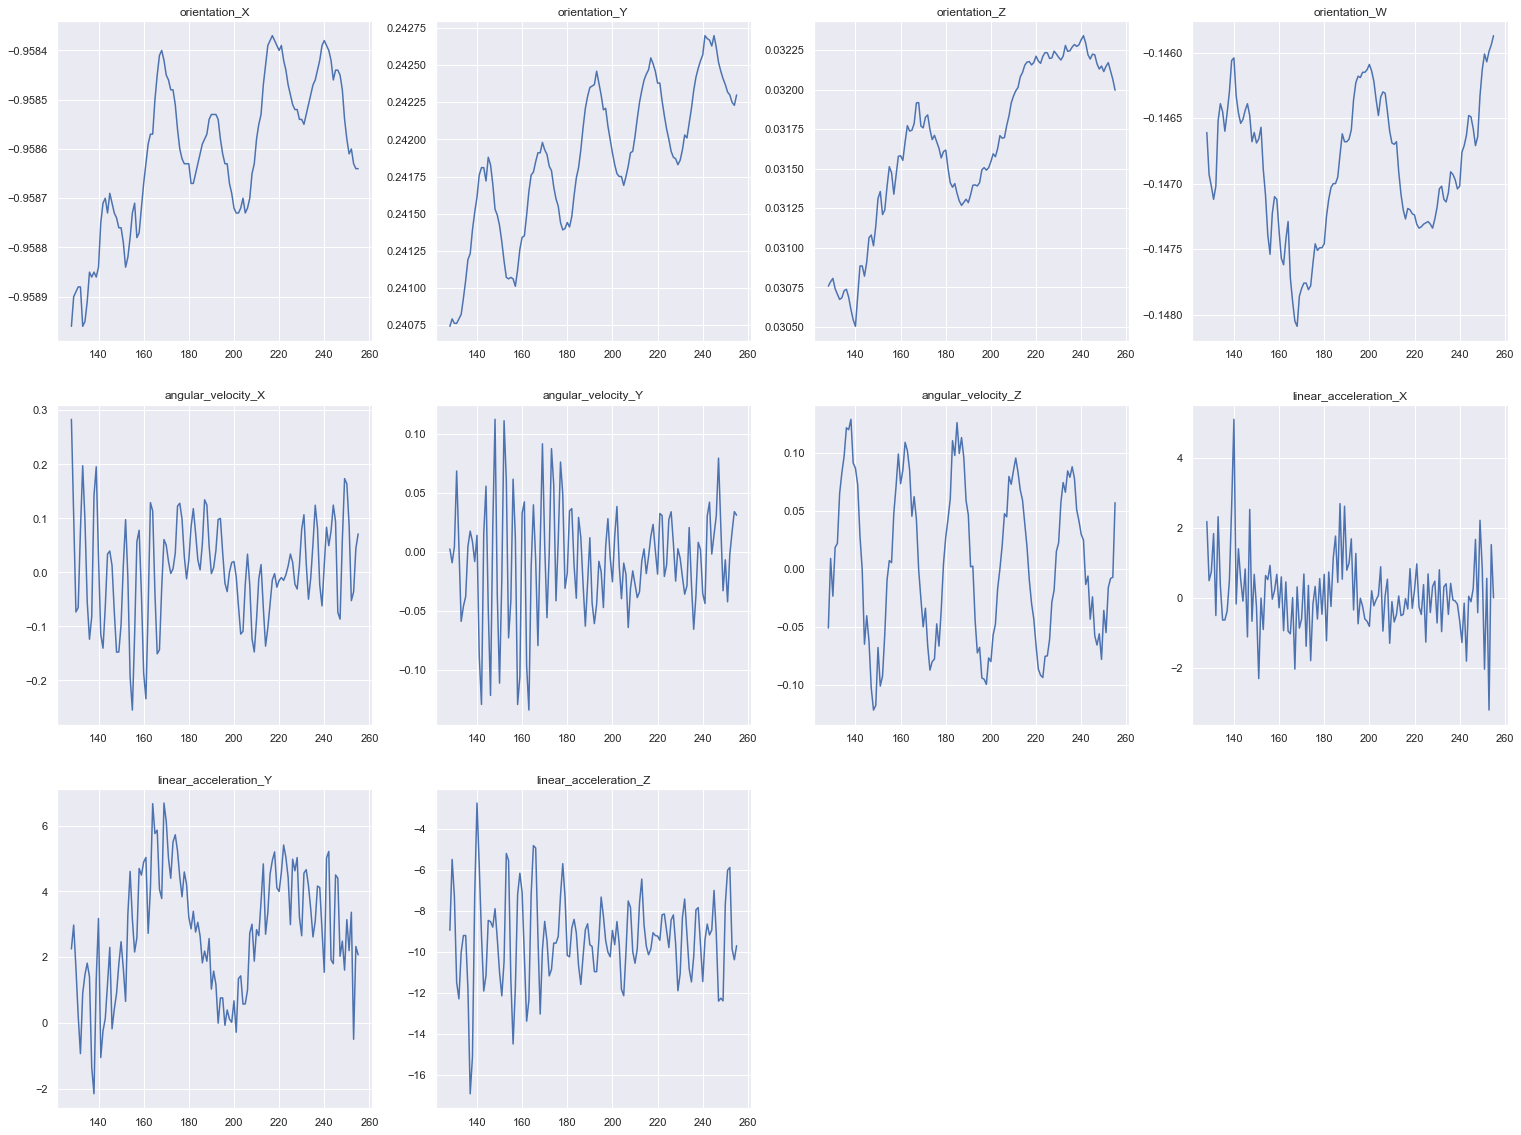

In [179]:
plt.figure(figsize=(26, 20))
for i, col in enumerate(train.columns[3:]):
    plt.subplot(3, 4, i + 1)
    plt.plot(train.loc[train['series_id'] == 1, col])
    plt.title(col)

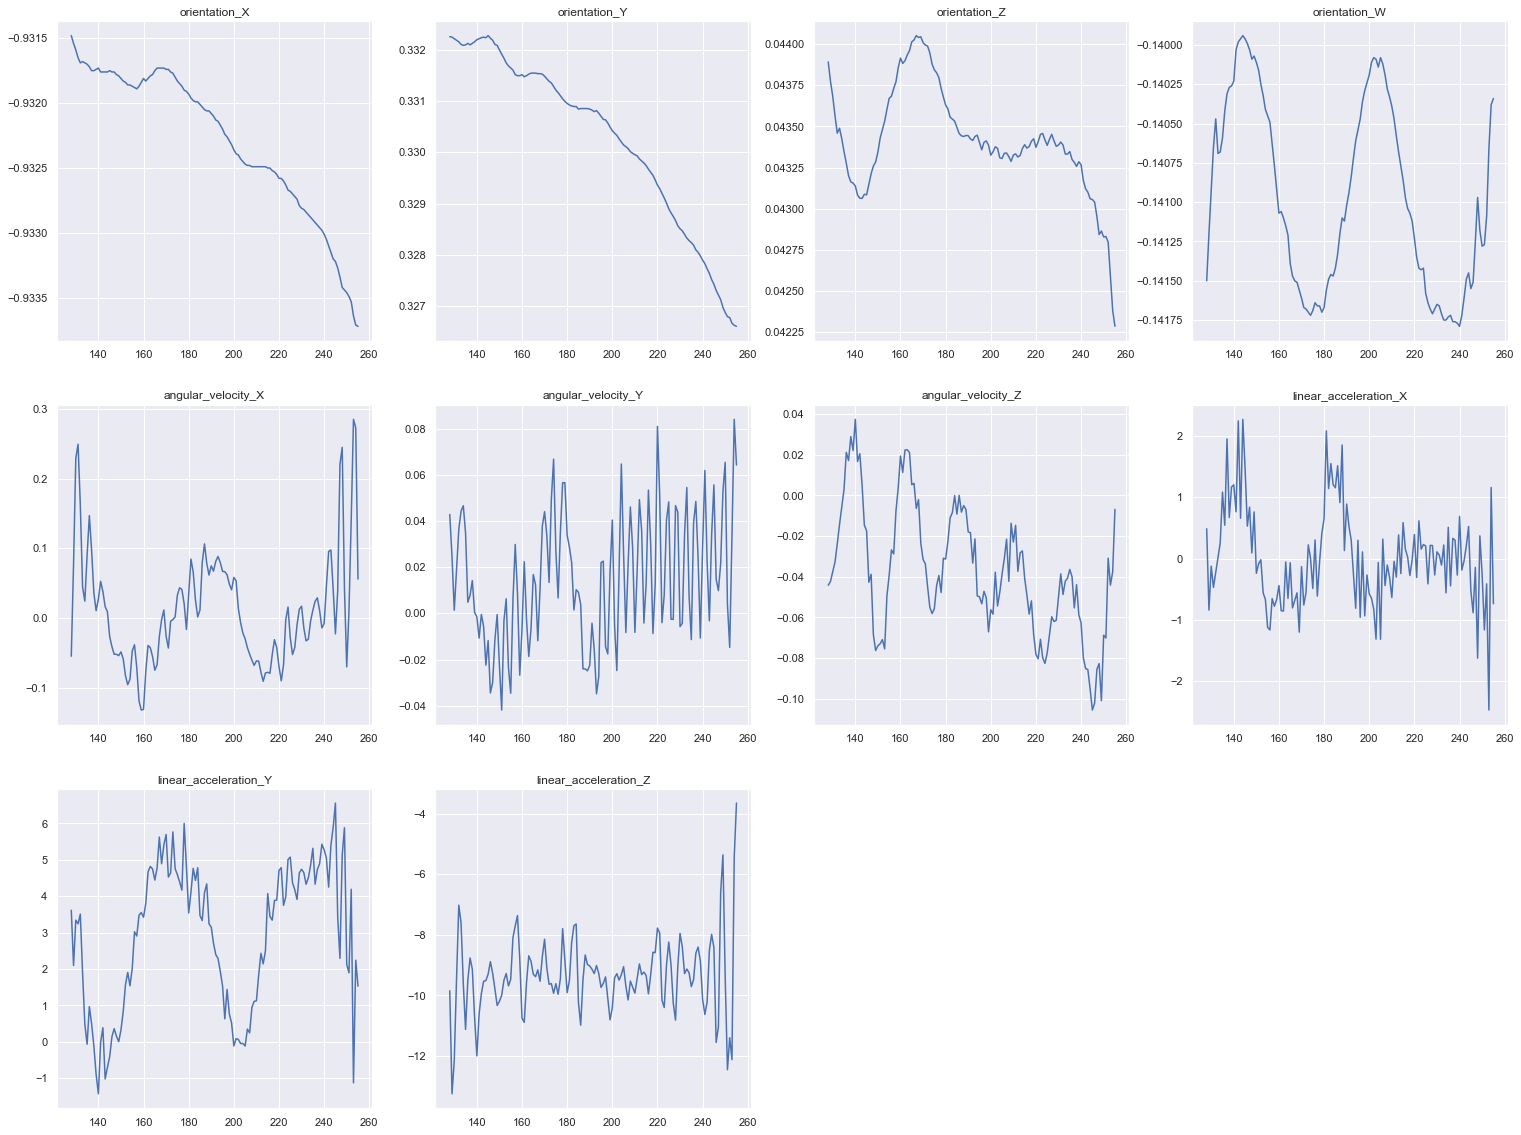

In [180]:
plt.figure(figsize=(26, 20))
for i, col in enumerate(test.columns[3:]):
    plt.subplot(3, 4, i + 1)
    plt.plot(test.loc[test['series_id'] == 1, col])
    plt.title(col)

In [181]:
# refrence from https://www.kaggle.com/jsaguiar/surface-recognition-baseline
def feature_extraction(raw_frame):
    frame = pd.DataFrame()
    raw_frame['angular_velocity'] = raw_frame['angular_velocity_X'] + raw_frame['angular_velocity_Y'] + raw_frame['angular_velocity_Z']
    raw_frame['linear_acceleration'] = raw_frame['linear_acceleration_X'] + raw_frame['linear_acceleration_Y'] + raw_frame['linear_acceleration_Y']
    raw_frame['velocity_to_acceleration'] = raw_frame['angular_velocity'] / raw_frame['linear_acceleration']
    
    for col in raw_frame.columns[3:]:
        frame[col + '_mean'] = raw_frame.groupby(['series_id'])[col].mean()
        frame[col + '_std'] = raw_frame.groupby(['series_id'])[col].std()
        frame[col + '_max'] = raw_frame.groupby(['series_id'])[col].max()
        frame[col + '_min'] = raw_frame.groupby(['series_id'])[col].min()
        frame[col + '_max_to_min'] = frame[col + '_max'] / frame[col + '_min']
        
        frame[col + '_mean_abs_change'] = raw_frame.groupby('series_id')[col].apply(lambda x: np.mean(np.abs(np.diff(x))))
        frame[col + '_abs_max'] = raw_frame.groupby('series_id')[col].apply(lambda x: np.max(np.abs(x)))
    return frame

In [182]:
train_df = feature_extraction(train)
test_df = feature_extraction(test)
train_df.head()

,orientation_X_mean,orientation_X_std,orientation_X_max,orientation_X_min,orientation_X_max_to_min,orientation_X_mean_abs_change,orientation_X_abs_max,orientation_Y_mean,orientation_Y_std,orientation_Y_max,...,linear_acceleration_max_to_min,linear_acceleration_mean_abs_change,linear_acceleration_abs_max,velocity_to_acceleration_mean,velocity_to_acceleration_std,velocity_to_acceleration_max,velocity_to_acceleration_min,velocity_to_acceleration_max_to_min,velocity_to_acceleration_mean_abs_change,velocity_to_acceleration_abs_max
series_id,,,,,,,,,,,,,,,,,,,,,
0,-0.758666,0.000363,-0.75822,-0.75953,0.998275,0.000015,0.75953,-0.634008,0.000471,-0.63306,...,-440.912422,1.507869,12.03250,0.023497,0.222562,2.444038,-0.163152,-14.980095,0.057500,2.444038
1,-0.958606,0.000151,-0.95837,-0.95896,0.999385,0.000023,0.95896,0.241867,0.000499,0.24270,...,-2.994224,2.680602,12.51448,0.006958,0.115248,1.157278,-0.258428,-4.478137,0.057504,1.157278
2,-0.512057,0.001377,-0.50944,-0.51434,0.990473,0.000041,0.51434,-0.846171,0.000785,-0.84490,...,-4.462653,1.855546,12.92295,0.049577,0.405777,4.445092,-0.336429,-13.212587,0.111821,4.445092
3,-0.939169,0.000227,-0.93884,-0.93968,0.999106,0.000026,0.93968,0.310140,0.000453,0.31147,...,-1.675275,3.938777,23.71235,-0.007084,0.202459,0.536344,-1.437307,-0.373159,0.086081,1.437307
4,-0.891301,0.002955,-0.88673,-0.89689,0.988672,0.000080,0.89689,0.428144,0.006165,0.43740,...,16.236353,0.645448,9.82879,-0.021466,0.026864,0.011489,-0.166277,-0.069095,0.007255,0.166277


In [183]:
train.groupby(['series_id'])['orientation_X'].mean()

series_id
0      -0.758666
1      -0.958606
2      -0.512057
3      -0.939169
4      -0.891301
5       0.464712
6      -0.402356
7      -0.925909
8       0.012041
9       0.789137
10      0.848894
11      0.494943
12      0.334088
13      0.374334
14     -0.504160
15     -0.942046
16     -0.959577
17      0.440159
18     -0.288716
19      0.828969
20      0.913093
21      0.013316
22     -0.962047
23     -0.283878
24      0.953858
25      0.345574
26     -0.819146
27      0.636444
28      0.940281
29      0.013447
          ...   
3780   -0.492772
3781    0.574534
3782    0.459721
3783    0.476901
3784   -0.985222
3785   -0.783996
3786   -0.883413
3787   -0.834405
3788    0.663345
3789   -0.578970
3790    0.710416
3791    0.804211
3792    0.640428
3793   -0.977197
3794    0.765214
3795   -0.349249
3796   -0.756406
3797   -0.115332
3798   -0.485740
3799   -0.174630
3800   -0.791608
3801    0.805973
3802   -0.167823
3803   -0.940845
3804   -0.969896
3805   -0.228787
3806    0.542262
3807

In [184]:
train_df.shape,test_df.shape

((3810, 91), (3816, 91))

In [185]:
le = LabelEncoder()
target_train = le.fit_transform(y_train['surface'])

In [186]:
 from sklearn.ensemble import RandomForestClassifier

In [187]:
from sklearn import model_selection
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(train_df, target_train, random_state = 0)

In [188]:
X_train.shape,X_test.shape

((2857, 91), (953, 91))

In [223]:
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [326]:
preds = []
K = 12
kf = KFold(n_splits = K, random_state = 3228, shuffle = True)

In [327]:
alg =  RandomForestClassifier()

In [328]:
for train_index, test_index in kf.split(X_train):
    train_X, valid_X = X_train[train_index], X_train[test_index]
    train_y, valid_y = Y_train[train_index], Y_train[test_index]
    alg.fit( train_X,  train_y)                   
    pred = alg.predict(X_test)
    preds.append(list(pred))

C:\Users\dk283\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [329]:
preds

[[5,
  0,
  1,
  1,
  0,
  6,
  5,
  0,
  2,
  1,
  5,
  7,
  1,
  5,
  2,
  2,
  5,
  5,
  1,
  6,
  1,
  8,
  5,
  1,
  8,
  1,
  1,
  8,
  4,
  1,
  5,
  8,
  2,
  1,
  5,
  0,
  5,
  1,
  5,
  6,
  1,
  2,
  7,
  5,
  8,
  1,
  7,
  1,
  1,
  7,
  5,
  7,
  7,
  5,
  4,
  5,
  7,
  5,
  1,
  1,
  5,
  5,
  7,
  2,
  8,
  6,
  5,
  1,
  8,
  5,
  0,
  7,
  5,
  7,
  5,
  2,
  6,
  2,
  1,
  1,
  1,
  2,
  1,
  7,
  6,
  5,
  4,
  4,
  7,
  4,
  7,
  6,
  1,
  2,
  6,
  7,
  5,
  8,
  7,
  5,
  6,
  0,
  7,
  4,
  7,
  7,
  4,
  2,
  1,
  4,
  2,
  5,
  7,
  5,
  5,
  1,
  6,
  6,
  7,
  5,
  6,
  8,
  7,
  8,
  8,
  8,
  4,
  0,
  7,
  4,
  1,
  5,
  8,
  4,
  1,
  8,
  5,
  5,
  1,
  1,
  8,
  1,
  5,
  1,
  2,
  5,
  8,
  5,
  1,
  5,
  8,
  6,
  6,
  6,
  8,
  7,
  8,
  8,
  7,
  8,
  5,
  1,
  8,
  5,
  1,
  2,
  2,
  8,
  1,
  4,
  4,
  1,
  5,
  8,
  8,
  1,
  5,
  1,
  8,
  8,
  1,
  1,
  8,
  6,
  4,
  6,
  5,
  5,
  1,
  1,
  4,
  1,
  6,
  5,
  5,
  1,
  1,
  7,
  4,
  1,


In [330]:
len(preds[0])

953

In [331]:
#testList = [1, 2, 3, 4, 2, 2, 1, 4, 4]
#print(max(set(testList), key = testList.count))

In [332]:
predx=[]
for i in range(len(preds[0])):
    sum=[]
    for j in range(K):
        sum.append(preds[j][i])
            
    predx.append(max(set(sum), key =sum.count))

In [333]:
len(predx)

953

In [334]:
accuracy_score(Y_test, predx)

0.8593913955928646

In [190]:
from sklearn.ensemble import RandomForestClassifier
alg1 =  RandomForestClassifier()
alg1.fit(X_train, Y_train)

C:\Users\dk283\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [191]:
len(Y_train),len(Y_test)

(2857, 953)

In [192]:
len(Y_test)

953

In [193]:
X_train.head()

,orientation_X_mean,orientation_X_std,orientation_X_max,orientation_X_min,orientation_X_max_to_min,orientation_X_mean_abs_change,orientation_X_abs_max,orientation_Y_mean,orientation_Y_std,orientation_Y_max,...,linear_acceleration_max_to_min,linear_acceleration_mean_abs_change,linear_acceleration_abs_max,velocity_to_acceleration_mean,velocity_to_acceleration_std,velocity_to_acceleration_max,velocity_to_acceleration_min,velocity_to_acceleration_max_to_min,velocity_to_acceleration_mean_abs_change,velocity_to_acceleration_abs_max
series_id,,,,,,,,,,,,,,,,,,,,,
1917,0.721314,0.000840,0.72295,0.71975,1.004446,0.000079,0.72295,-0.676928,0.000814,-0.67530,...,-2.483320,7.341781,29.4636,0.017840,0.143988,0.976405,-0.390232,-2.502112,0.114202,0.976405
1002,-0.256844,0.000603,-0.25507,-0.25745,0.990755,0.000028,0.25745,0.954619,0.000148,0.95510,...,1.683510,0.141853,6.2987,0.001368,0.004858,0.016077,-0.005405,-2.974641,0.001172,0.016077
3520,-0.775761,0.001199,-0.77378,-0.77815,0.994384,0.000094,0.77815,0.612676,0.001528,0.61515,...,-1.011165,8.208325,28.5830,0.042853,0.190465,1.723403,-0.152544,-11.297769,0.104301,1.723403
1093,-0.235868,0.008497,-0.21951,-0.24850,0.883340,0.000228,0.24850,-0.960342,0.002022,-0.95711,...,-2.454117,4.593069,20.1083,0.008189,0.503459,5.068617,-2.296141,-2.207450,0.177526,5.068617
3217,0.802134,0.006665,0.81248,0.79013,1.028286,0.000178,0.81248,0.577627,0.009282,0.59426,...,-1.475694,10.204475,25.8394,-0.004941,0.113557,0.339183,-0.557374,-0.608538,0.101639,0.557374


In [194]:
y_pred=alg1.predict(X_test)

In [195]:
accuracy_score(Y_test, y_pred)

0.838405036726128

In [196]:
params = {
    'num_leaves': 20,
    'min_data_in_leaf': 15,
    'objective': 'multiclass',
    'max_depth': 8,
    'learning_rate': 0.01,
    "boosting": "gbdt",
    "bagging_freq": 5,
    "bagging_fraction": 0.8126672064208567,
    "bagging_seed": 11,
    "verbosity": -1,
    'reg_alpha': 0.1302650970728192,
    'reg_lambda': 0.3603427518866501,
    "num_class": 9,
    'nthread': -1
}

def multiclass_accuracy(preds, train_data):
    labels = train_data.get_label()
    pred_class = np.argmax(preds.reshape(9, -1).T, axis=1)
    return 'multi_accuracy', np.mean(labels == pred_class), True

t0 = time.time()
train_set = lgb.Dataset(X_train, label=Y_train)
eval_hist = lgb.cv(params, train_set, nfold=8, num_boost_round=1400,
                   early_stopping_rounds=80, seed=19, feval=multiclass_accuracy)
num_rounds = len(eval_hist['multi_logloss-mean'])
# retrain the model and make predictions for test set
clf = lgb.train(params, train_set, num_boost_round=num_rounds)
predictions = clf.predict(X_test, num_iteration=None)
print("Timer: {:.1f}s".format(time.time() - t0))

Timer: 503.0s


In [197]:
predictions

array([[1.33088872e-03, 3.78920903e-03, 5.64679777e-03, ...,
        9.85334812e-04, 6.38757059e-03, 7.10980158e-03],
       [9.86171593e-01, 8.93559165e-04, 1.44896899e-03, ...,
        1.73822236e-04, 9.88178412e-04, 7.55898907e-03],
       [1.92568573e-03, 8.26025185e-01, 2.56127226e-02, ...,
        2.22397383e-03, 3.09246630e-02, 1.83061356e-02],
       ...,
       [2.92559713e-04, 4.16210849e-03, 1.05201435e-03, ...,
        9.73192909e-01, 8.15873965e-03, 3.24775933e-03],
       [2.22800718e-03, 8.00704428e-01, 1.22708135e-01, ...,
        2.47175218e-03, 2.86476036e-02, 1.27388219e-02],
       [9.28931130e-04, 9.78289921e-01, 6.26999058e-03, ...,
        4.79333532e-04, 1.98027838e-03, 3.24769677e-03]])

In [198]:
idx = predictions.argmax(axis=1)
y_pred1 = (idx[:,None] == np.arange(predictions.shape[1])).astype(int)
y_pred1

array([[0, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 1, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0]])

In [199]:
y_pred1.shape

(953, 9)

In [200]:
y_pred1 = [np.where(r == 1)[0][0] for r in y_pred1]
y_pred1

[5,
 0,
 1,
 1,
 0,
 3,
 5,
 0,
 2,
 1,
 5,
 7,
 1,
 5,
 8,
 2,
 5,
 5,
 7,
 6,
 1,
 8,
 5,
 1,
 8,
 1,
 1,
 1,
 4,
 1,
 5,
 8,
 2,
 1,
 5,
 0,
 5,
 4,
 5,
 6,
 1,
 2,
 7,
 5,
 8,
 1,
 7,
 1,
 1,
 7,
 5,
 7,
 7,
 6,
 4,
 5,
 7,
 5,
 1,
 1,
 5,
 5,
 7,
 2,
 8,
 6,
 5,
 1,
 8,
 5,
 8,
 7,
 5,
 7,
 5,
 1,
 6,
 7,
 1,
 1,
 1,
 2,
 1,
 7,
 6,
 5,
 4,
 4,
 7,
 4,
 7,
 6,
 1,
 5,
 6,
 7,
 5,
 8,
 7,
 5,
 6,
 0,
 7,
 4,
 7,
 7,
 4,
 2,
 1,
 4,
 2,
 5,
 7,
 5,
 8,
 7,
 6,
 6,
 7,
 5,
 6,
 8,
 7,
 8,
 8,
 8,
 4,
 1,
 7,
 4,
 1,
 8,
 8,
 4,
 1,
 8,
 5,
 2,
 1,
 1,
 8,
 1,
 5,
 5,
 8,
 5,
 8,
 5,
 1,
 5,
 8,
 6,
 6,
 6,
 8,
 7,
 4,
 8,
 1,
 8,
 5,
 1,
 8,
 5,
 1,
 2,
 2,
 8,
 8,
 4,
 4,
 1,
 5,
 8,
 8,
 1,
 7,
 1,
 8,
 2,
 1,
 1,
 8,
 6,
 4,
 6,
 5,
 5,
 1,
 1,
 4,
 1,
 6,
 5,
 5,
 1,
 2,
 7,
 4,
 6,
 5,
 2,
 2,
 6,
 8,
 6,
 8,
 0,
 0,
 8,
 4,
 5,
 1,
 5,
 8,
 7,
 8,
 4,
 2,
 5,
 7,
 4,
 1,
 1,
 8,
 7,
 4,
 7,
 8,
 5,
 2,
 1,
 5,
 4,
 4,
 1,
 4,
 5,
 6,
 7,
 4,
 8,
 8,
 5,
 4,
 7,
 5,
 1,
 7,
 2,


In [201]:
accuracy_score(Y_test, y_pred1)

0.8856243441762854

In [202]:
Y_train.shape

(2857,)

In [203]:
#b = np.zeros((a.size, a.max()+1))

In [204]:
b = np.zeros((2857, 9))
b[np.arange(2857), Y_train] = 1
b

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 0., 0.]])

In [205]:
b.shape

(2857, 9)

In [206]:
X_train.shape

(2857, 91)

In [207]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.optimizers import SGD

In [337]:
predsd = []
K = 3
kf = KFold(n_splits = K, random_state = 3228, shuffle = True)

In [ ]:
preds=[]
for i in range(len(xgb_preds[0])):
    sum=0
    for j in range(K):
        sum+=xgb_preds[j][i]
    preds.append(sum / K)

output = pd.DataFrame({'ID_code': id, 'target': preds})
output.to_csv("{}-foldCV_avg_sub.csv".format(K), index=False) 

In [338]:
for train_index, test_index in kf.split(X_train):
    train_X, valid_X = X_train[train_index], X_train[test_index]
    train_y, valid_y = Y_train[train_index], Y_train[test_index]
    classifier = Sequential()
    classifier.add(Dense(output_dim = 100, init = 'uniform', activation = 'relu', input_dim = 91))
    classifier.add(Dropout(0.1))
    classifier.add(Dense(output_dim = 60, init = 'uniform', activation = 'relu'))
    classifier.add(Dropout(0.1))
    classifier.add(Dense(output_dim = 40, init = 'uniform', activation = 'relu'))
    classifier.add(Dense(output_dim = 9, init = 'uniform', activation = 'softmax'))
    classifier.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
    classifier.fit(X_train, b, nb_epoch = 5)
    pred = classifier.predict(X_test)
    predsd.append(list(pred))

C:\Users\dk283\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=91, units=100, kernel_initializer="uniform")`
  """
C:\Users\dk283\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=60, kernel_initializer="uniform")`
  import sys
C:\Users\dk283\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=40, kernel_initializer="uniform")`
  if __name__ == '__main__':
C:\Users\dk283\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="softmax", units=9, kernel_initializer="uniform")`
  # Remove the CWD from sys.path while we load stuff.
C:\Users\dk2

Epoch 1/5
2857/2857 [==============================] - 2s 555us/step - loss: 1.9009 - acc: 0.3619
Epoch 2/5
2857/2857 [==============================] - 0s 74us/step - loss: 1.5909 - acc: 0.4060
Epoch 3/5
2857/2857 [==============================] - 0s 75us/step - loss: 1.4466 - acc: 0.4435
Epoch 4/5
2857/2857 [==============================] - 0s 70us/step - loss: 1.3591 - acc: 0.4858
Epoch 5/5
2857/2857 [==============================] - 0s 76us/step - loss: 1.2786 - acc: 0.5163


C:\Users\dk283\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=91, units=100, kernel_initializer="uniform")`
  """
C:\Users\dk283\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=60, kernel_initializer="uniform")`
  import sys
C:\Users\dk283\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=40, kernel_initializer="uniform")`
  if __name__ == '__main__':
C:\Users\dk283\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="softmax", units=9, kernel_initializer="uniform")`
  # Remove the CWD from sys.path while we load stuff.
C:\Users\dk2

Epoch 1/5
2857/2857 [==============================] - 2s 648us/step - loss: 1.9380 - acc: 0.2786
Epoch 2/5
2857/2857 [==============================] - 0s 98us/step - loss: 1.6098 - acc: 0.4008
Epoch 3/5
2857/2857 [==============================] - 0s 88us/step - loss: 1.4500 - acc: 0.4599
Epoch 4/5
2857/2857 [==============================] - 0s 78us/step - loss: 1.3214 - acc: 0.4911
Epoch 5/5
2857/2857 [==============================] - 0s 73us/step - loss: 1.2481 - acc: 0.5264


C:\Users\dk283\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=91, units=100, kernel_initializer="uniform")`
  """
C:\Users\dk283\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=60, kernel_initializer="uniform")`
  import sys
C:\Users\dk283\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=40, kernel_initializer="uniform")`
  if __name__ == '__main__':
C:\Users\dk283\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="softmax", units=9, kernel_initializer="uniform")`
  # Remove the CWD from sys.path while we load stuff.
C:\Users\dk2

Epoch 1/5
2857/2857 [==============================] - 2s 699us/step - loss: 1.9017 - acc: 0.3630
Epoch 2/5
2857/2857 [==============================] - 0s 91us/step - loss: 1.6138 - acc: 0.4162
Epoch 3/5
2857/2857 [==============================] - 0s 84us/step - loss: 1.4951 - acc: 0.4407
Epoch 4/5
2857/2857 [==============================] - 0s 93us/step - loss: 1.3870 - acc: 0.4876
Epoch 5/5
2857/2857 [==============================] - 0s 88us/step - loss: 1.3003 - acc: 0.5093


In [ ]:
results=[][][]
for i in range(k):
    for j in range(len(predsd[0])):
        for k in range(9):
            predsd[i][j][k]+=

    preds.append(sum / K)


In [433]:
a=predsd[0]
b=predsd[1]
c=predsd[2]
a=np.array(a)
b=np.array(b)
c=np.array(c)
f=(a+b+c)/K

In [437]:
f

array([[2.21282002e-02, 2.08880287e-02, 7.11323470e-02, ...,
        2.70843804e-02, 1.42967142e-02, 6.77145123e-02],
       [1.30487919e-01, 1.90639272e-01, 1.30089447e-01, ...,
        6.63288916e-03, 1.62426516e-01, 2.01131538e-01],
       [6.24942081e-03, 3.14201444e-01, 1.40410557e-01, ...,
        1.80322495e-05, 1.27699375e-01, 1.51561974e-02],
       ...,
       [2.72949338e-02, 2.81248312e-03, 1.56081906e-02, ...,
        6.67785227e-01, 2.19742232e-03, 1.08579010e-01],
       [1.80372726e-02, 2.81717777e-01, 1.76205322e-01, ...,
        1.98345908e-04, 1.72946736e-01, 2.98001543e-02],
       [3.24902870e-02, 3.25995922e-01, 2.61292607e-01, ...,
        5.91300195e-05, 2.15696141e-01, 1.01840384e-01]], dtype=float32)

In [438]:
idx = f.argmax(axis=1)
y_predx = (idx[:,None] == np.arange(f.shape[1])).astype(int)
y_predx

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 1, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0]])

In [439]:
y_predx = [np.where(r == 1)[0][0] for r in y_predx]

In [440]:
y_predx

[5,
 8,
 5,
 1,
 4,
 5,
 5,
 8,
 2,
 1,
 5,
 1,
 1,
 1,
 2,
 1,
 5,
 5,
 1,
 6,
 1,
 8,
 5,
 1,
 8,
 1,
 2,
 1,
 4,
 1,
 5,
 8,
 2,
 1,
 5,
 8,
 5,
 2,
 5,
 6,
 1,
 1,
 1,
 5,
 8,
 1,
 1,
 1,
 1,
 1,
 6,
 1,
 1,
 6,
 1,
 8,
 1,
 5,
 2,
 2,
 5,
 5,
 1,
 8,
 8,
 6,
 5,
 1,
 5,
 5,
 8,
 1,
 5,
 1,
 5,
 1,
 6,
 1,
 2,
 1,
 1,
 2,
 1,
 1,
 6,
 5,
 4,
 4,
 7,
 4,
 1,
 6,
 1,
 6,
 6,
 1,
 5,
 5,
 7,
 5,
 6,
 8,
 1,
 7,
 1,
 1,
 4,
 5,
 1,
 5,
 2,
 5,
 1,
 5,
 8,
 7,
 6,
 6,
 1,
 5,
 6,
 5,
 1,
 8,
 5,
 7,
 1,
 8,
 5,
 4,
 1,
 5,
 8,
 4,
 4,
 8,
 5,
 5,
 1,
 1,
 8,
 1,
 1,
 2,
 8,
 5,
 8,
 5,
 1,
 5,
 2,
 6,
 6,
 6,
 8,
 2,
 1,
 8,
 1,
 8,
 2,
 1,
 8,
 5,
 1,
 5,
 5,
 8,
 8,
 1,
 6,
 7,
 8,
 8,
 8,
 1,
 5,
 1,
 8,
 2,
 1,
 1,
 8,
 6,
 4,
 6,
 5,
 5,
 2,
 1,
 4,
 1,
 6,
 5,
 5,
 1,
 2,
 7,
 4,
 5,
 5,
 2,
 5,
 5,
 8,
 6,
 8,
 1,
 8,
 8,
 4,
 6,
 1,
 5,
 1,
 5,
 6,
 4,
 2,
 5,
 1,
 4,
 1,
 1,
 6,
 1,
 4,
 1,
 8,
 5,
 1,
 1,
 8,
 1,
 1,
 1,
 4,
 5,
 6,
 1,
 6,
 8,
 5,
 5,
 1,
 1,
 5,
 7,
 1,
 5,


In [441]:
accuracy_score(Y_test, y_predx)

0.5445960125918153

In [385]:
predsd[2][0]

array([0.04089279, 0.0170941 , 0.05967696, 0.00266603, 0.01118359,
       0.7199724 , 0.06450757, 0.01314262, 0.07086395], dtype=float32)

In [378]:
 predsd[0][952][8]

0.1170319

In [368]:
len(predsd[0])

953

In [349]:
len( predsd[0])

953

In [347]:
predx1=[]
for i in range(len( predsd[0])):
    sum=[]
    for j in range(K):
        idx =  predsd[j].argmax(axis=1)
        y_pred2 = (idx[:,None] == np.arange(predsd[j].shape[1])).astype(int)
        y_pred2 = [np.where(r == 1)[0][0] for r in y_pred2]    
        sum.append( predsd[j][i])
            
    predx1.append(max(set(sum), key =sum.count))

AttributeError: 'list' object has no attribute 'argmax'

In [351]:
predsd[0]

[array([0.01765543, 0.02185786, 0.07645299, 0.00140919, 0.00369692,
        0.7694098 , 0.01232791, 0.01219613, 0.08499379], dtype=float32),
 array([0.1065234 , 0.19721675, 0.11140035, 0.00316464, 0.19243191,
        0.02030418, 0.00247786, 0.16231528, 0.20416561], dtype=float32),
 array([4.0291660e-03, 2.9631585e-01, 8.5636705e-02, 1.0619528e-05,
        7.2731219e-02, 4.0067482e-01, 4.6003547e-06, 1.2690903e-01,
        1.3688037e-02], dtype=float32),
 array([3.2513873e-03, 4.2820451e-01, 5.6342661e-02, 4.3110536e-08,
        3.2449844e-03, 1.9660270e-04, 4.4294763e-09, 4.6374154e-01,
        4.5018304e-02], dtype=float32),
 array([4.0851776e-02, 2.5086677e-01, 3.6727138e-02, 3.2691639e-06,
        3.0215156e-01, 3.1738222e-04, 1.3409548e-06, 1.5608734e-01,
        2.1299338e-01], dtype=float32),
 array([0.04253745, 0.01079989, 0.04120383, 0.02349984, 0.02029816,
        0.2860532 , 0.42849275, 0.0074758 , 0.13963905], dtype=float32),
 array([4.94932616e-03, 1.62775610e-02, 2.6961203

In [350]:
idx = predsd[0].argmax(axis=1)
y_pred3 = (idx[:,None] == np.arange(predsd[0].shape[1])).astype(int)
y_pred3

AttributeError: 'list' object has no attribute 'argmax'

In [341]:
classifier = Sequential()
classifier.add(Dense(output_dim = 100, init = 'uniform', activation = 'relu', input_dim = 91))
classifier.add(Dropout(0.1))
classifier.add(Dense(output_dim = 60, init = 'uniform', activation = 'relu'))
classifier.add(Dropout(0.1))
classifier.add(Dense(output_dim = 40, init = 'uniform', activation = 'relu'))
classifier.add(Dense(output_dim = 9, init = 'uniform', activation = 'softmax'))

C:\Users\dk283\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=91, units=100, kernel_initializer="uniform")`
  
C:\Users\dk283\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=60, kernel_initializer="uniform")`
  after removing the cwd from sys.path.
C:\Users\dk283\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=40, kernel_initializer="uniform")`
  
C:\Users\dk283\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="softmax", units=9, kernel_initializer="uniform")`
  import sys


In [342]:
classifier.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [343]:
classifier.fit(X_train, b, nb_epoch = 5)

C:\Users\dk283\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Epoch 1/5
2857/2857 [==============================] - 2s 600us/step - loss: 1.8850 - acc: 0.3084
Epoch 2/5
2857/2857 [==============================] - 0s 73us/step - loss: 1.5840 - acc: 0.4046
Epoch 3/5
2857/2857 [==============================] - 0s 79us/step - loss: 1.4512 - acc: 0.4484
Epoch 4/5
2857/2857 [==============================] - 0s 67us/step - loss: 1.3454 - acc: 0.4788
Epoch 5/5
2857/2857 [==============================] - 0s 71us/step - loss: 1.2467 - acc: 0.5275


In [352]:
y_pred = classifier.predict(X_test)
y_pred

array([[1.34167448e-02, 1.21836010e-02, 4.77402955e-02, ...,
        1.63881369e-02, 7.83660915e-03, 6.12264760e-02],
       [1.16798386e-01, 2.32420936e-01, 6.62467331e-02, ...,
        5.34717180e-03, 1.42364591e-01, 8.34963545e-02],
       [2.29959749e-03, 5.30053914e-01, 9.00225267e-02, ...,
        1.91009553e-06, 2.03023702e-01, 7.91697577e-03],
       ...,
       [1.81591567e-02, 2.83498829e-03, 7.03851180e-03, ...,
        6.23002827e-01, 2.39631743e-03, 7.41053447e-02],
       [8.15340132e-03, 3.82306904e-01, 1.67741716e-01, ...,
        1.92553016e-05, 2.50053644e-01, 1.86865535e-02],
       [3.42774615e-02, 4.54806864e-01, 1.26717135e-01, ...,
        4.63069955e-05, 2.48693168e-01, 9.05467942e-02]], dtype=float32)

In [380]:
type(y_pred)

numpy.ndarray

In [356]:
y_pred[0]

array([1.3416745e-02, 1.2183601e-02, 4.7740296e-02, 8.3681499e-04,
       2.1637126e-03, 8.3820760e-01, 1.6388137e-02, 7.8366091e-03,
       6.1226476e-02], dtype=float32)

In [355]:
y_pred[1][1]

0.23242094

In [345]:
idx = y_pred.argmax(axis=1)
y_pred = (idx[:,None] == np.arange(y_pred.shape[1])).astype(int)
y_pred

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 1, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0]])

In [213]:
y_pred = [np.where(r == 1)[0][0] for r in y_pred]

In [214]:
y_pred

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [215]:
accuracy_score(Y_test, y_pred)

0.05456453305351522

In [216]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, y_pred)

In [217]:
cm

array([[ 52,   0,   0,   0,   0,   0,   0,   0,   0],
       [180,   0,   0,   0,   0,   0,   0,   0,   0],
       [ 86,   0,   0,   0,   0,   0,   0,   0,   0],
       [  7,   0,   0,   0,   0,   0,   0,   0,   0],
       [ 77,   0,   0,   0,   0,   0,   0,   0,   0],
       [193,   0,   0,   0,   0,   0,   0,   0,   0],
       [ 75,   0,   0,   0,   0,   0,   0,   0,   0],
       [129,   0,   0,   0,   0,   0,   0,   0,   0],
       [154,   0,   0,   0,   0,   0,   0,   0,   0]], dtype=int64)

In [ ]:
params = {
    'num_leaves': 20,
    'min_data_in_leaf': 15,
    'objective': 'multiclass',
    'max_depth': 10,
    'learning_rate': 0.01,
    "boosting": "gbdt",
    "bagging_freq": 5,
    "bagging_fraction": 0.8126672064208567,
    "bagging_seed": 11,
    "verbosity": -1,
    'reg_alpha': 0.1302650970728192,
    'reg_lambda': 0.3603427518866501,
    "num_class": 9,
    'nthread': -1
}

def multiclass_accuracy(preds, train_data):
    labels = train_data.get_label()
    pred_class = np.argmax(preds.reshape(9, -1).T, axis=1)
    return 'multi_accuracy', np.mean(labels == pred_class), True

t0 = time.time()
train_set = lgb.Dataset(train_df, label=target_train)
eval_hist = lgb.cv(params, train_set, nfold=20, num_boost_round=1400,
                   early_stopping_rounds=80, seed=19, feval=multiclass_accuracy)
num_rounds = len(eval_hist['multi_logloss-mean'])
# retrain the model and make predictions for test set
clf = lgb.train(params, train_set, num_boost_round=num_rounds)
predictions = clf.predict(test_df, num_iteration=None)
print("Timer: {:.1f}s".format(time.time() - t0))

Timer: 1204.6s


In [ ]:
predictions

array([[6.71989413e-03, 1.80132958e-02, 1.21804447e-01, ...,
        2.00096034e-03, 1.07187581e-01, 8.51842081e-03],
       [3.07689032e-01, 4.26631487e-01, 2.74486611e-02, ...,
        1.20648317e-02, 2.10949015e-02, 6.24298951e-02],
       [1.82591659e-03, 1.60382868e-02, 2.94126185e-02, ...,
        2.07720614e-03, 9.12311060e-01, 2.78729525e-02],
       ...,
       [5.34280217e-03, 4.97105654e-01, 7.49301629e-02, ...,
        8.74569836e-03, 2.41555015e-02, 8.58681815e-02],
       [5.34835521e-02, 7.90696594e-01, 5.53712674e-03, ...,
        2.91816995e-03, 1.72331090e-02, 1.13948514e-01],
       [7.72935692e-03, 1.79932318e-03, 8.63922177e-04, ...,
        6.50245270e-04, 1.70420309e-03, 9.81025320e-01]])

Validation logloss: 0.3244, accuracy: 0.8977


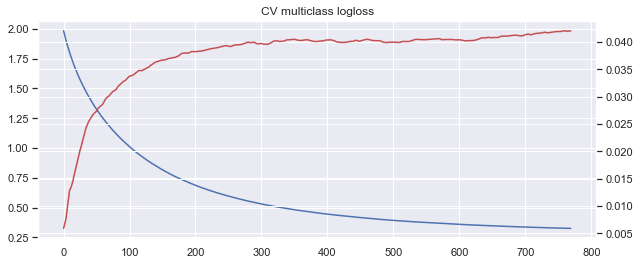

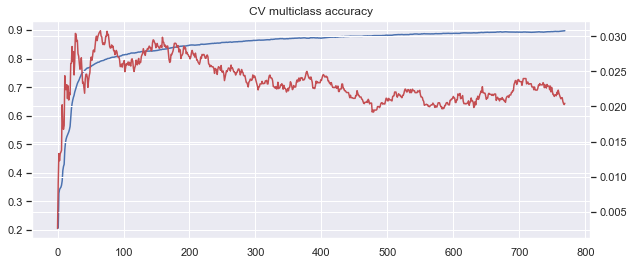

In [ ]:
v1, v2 = eval_hist['multi_logloss-mean'][-1], eval_hist['multi_accuracy-mean'][-1]
print("Validation logloss: {:.4f}, accuracy: {:.4f}".format(v1, v2))
plt.figure(figsize=(10, 4))
plt.title("CV multiclass logloss")
num_rounds = len(eval_hist['multi_logloss-mean'])
ax = sns.lineplot(x=range(num_rounds), y=eval_hist['multi_logloss-mean'])
ax2 = ax.twinx()
p = sns.lineplot(x=range(num_rounds), y=eval_hist['multi_logloss-stdv'], ax=ax2, color='r')

plt.figure(figsize=(10, 4))
plt.title("CV multiclass accuracy")
num_rounds = len(eval_hist['multi_accuracy-mean'])
ax = sns.lineplot(x=range(num_rounds), y=eval_hist['multi_accuracy-mean'])
ax2 = ax.twinx()
p = sns.lineplot(x=range(num_rounds), y=eval_hist['multi_accuracy-stdv'], ax=ax2, color='r')

In [ ]:
importance = pd.DataFrame({'gain': clf.feature_importance(importance_type='gain'),
                           'feature': clf.feature_name()})
importance.sort_values(by='gain', ascending=False, inplace=True)
plt.figure(figsize=(10, 20))
ax = sns.barplot(x='gain', y='feature', data=importance)

In [ ]:
sample_submission['surface'] = le.inverse_transform(predictions.argmax(axis=1))
sample_submission.to_csv('Lgb.csv', index=False)